<a href="https://colab.research.google.com/github/philongbuile/houseprice_prediction/blob/main/LGBM_Boston_HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some general key factors which effect property prices are as follows

1. Supply and demand Put simply if demand for houses increases faster than supply, then house prices go up. For house prices to fall the demand needs to fall.

2. Interest rates When interest rates rise, mortgage lenders generally increase the cost of variable mortgage payments. These higher interest rates in turn make home buying less attractive. Since the majority of Australian homeowners have variable mortgages, even a small change in interest rates can have a big impact on the affordability of buying a house.

3. Economic growth As the economy grows and wages increase more people can afford buy a house, this inturn increases overall demand, which increases prices. See number 1.

4. Demographics As levels of migration increase so does the population and more people means more demand for homes. Another factor is changes in demographics; for example rising divorce rates have increased the number of single people living alone and our old friend demand is an issue again.

5. Location, location, location This is an obvious one. Homes that are closer to the beach, closer to the CBD or closer to transport tend to sell at a higher price. Australia is a vast and varied country but if you look at any map you'll see a high concentration of housing around the city centres .The majority of people want to live close to where they work, shop and go out to enjoy themselves and this naturally causes higher demand for property prices in these areas.

6. Room to move The potential for growth is a key issue in determining the value of a property. This relates to the potential to add on a second storey, increase the number of bedrooms or add a room above a garage or in the garden. Increasing the floor area, will increase the value. This relates back to the value of Location and land size in determining house prices.

7. A second bathroom If two identical properties were for sale in the same street, the one with the extra bathroom would sell for more. Simple. However, the value of the bathrooms relates directly to the number of rooms in the property. For example a second bathroom in a two-bedroom house would be less desirable than in a five-bedroom house.

8. Parking We all know that parking is at a premium in our big cities so if a home has parking or even a garage this can significantly increase the value of a home.

9. Home improvements Updating kitchens, replacing flooring, repainting walls and adding landscaping can add to the value of a home. However often homeowners spend too much and don't get the return on investment when they sell the house. Before making drastic improvements to your house, be sure to talk with your real estate agent so that you use your money wisely on your investment.

**Importing important libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

train_url='https://drive.google.com/file/d/1REmTs7DxX0PjWMIPqyXkPQiIE2g0gX_K/view?usp=share_link'
test_url = 'https://drive.google.com/file/d/1REmTs7DxX0PjWMIPqyXkPQiIE2g0gX_K/view?usp=share_link'
train_path = 'https://drive.google.com/uc?export=download&id='+train_url.split('/')[-2]
test_path = 'https://drive.google.com/uc?export=download&id='+test_url.split('/')[-2]
train=pd.read_csv(train_path)
test=pd.read_csv(test_path)
train_ID = train['Id']
test_ID = test['Id']
y_train=y = train['SalePrice']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
train.select_dtypes(include=['int64','float64'])
train.select_dtypes(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Checking out the number of Categorical Data and Numerical data and adding them up to find out the total feature types

In [ ]:
categorical=len(train.select_dtypes(include=['object']).columns)
numbers=len(train.select_dtypes(include=['float64','int64']).columns)
print("Total number of Categorical Data is:",categorical)
print("Total number of Numerical Data is:",numbers)
print("Total Features are:",categorical+numbers)

Total number of Categorical Data is: 43
Total number of Numerical Data is: 37
Total Features are: 80


Check out the shape of our training and testing dataset

Trying to understand the density value for Sale price



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


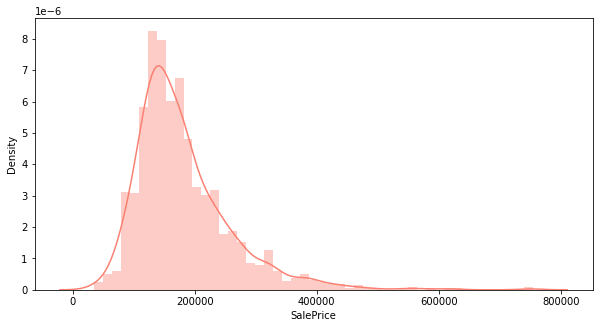

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(train['SalePrice'],color='salmon')

Since there is a lot of data present in this particular problem we shall use correltion matrix to find out the maximum correlation between features through heatmaps

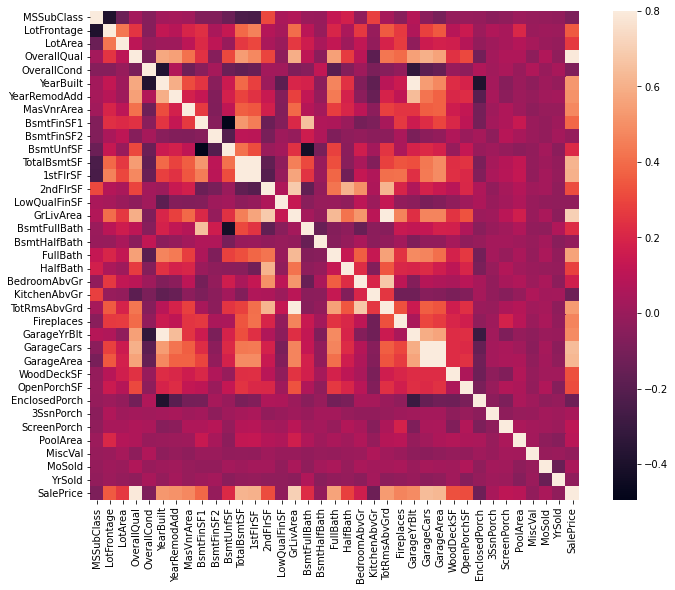

In [ ]:
corrmat=train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Now we shall find the Top ten most correlated features to sale price

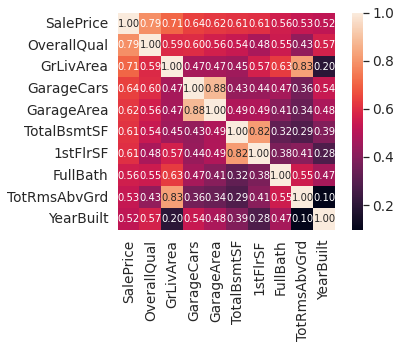

In [ ]:
k = 10 #number of variables for heatmap
c = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[c].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=c.values, xticklabels=c.values)
plt.show()

Most Correlated features

In [ ]:
most_cor=pd.DataFrame(c)
most_cor

,0
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


Feature exploration
OverallQual: Rates the overall material and finish of the house

GrLivArea: Above grade (ground) living area square feet

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

TotalBsmtSF: Total square feet of basement area

1stFlrSF: First Floor square feet

FullBath: Full bathrooms above grade

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

YearBuilt: Original construction date

Now we shall se that how they affect the Sale Price through easy yet informative visualisations

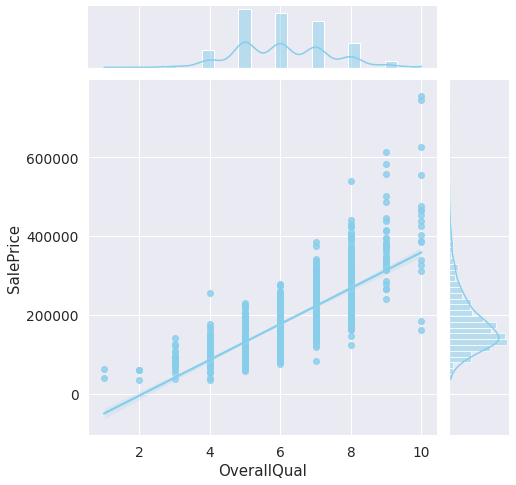

In [ ]:
sns.jointplot(x=train['OverallQual'], y=train['SalePrice'], kind='reg',color='skyblue',height=7)

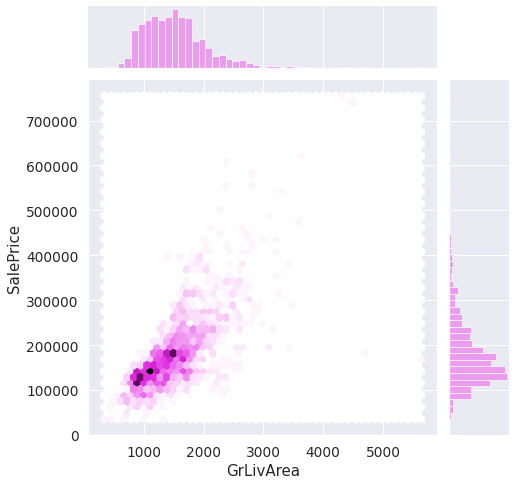

In [ ]:
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'], kind='hex',color='violet',height=7)

In [ ]:
train = train.drop(train[(train['GrLivArea']>4000) 
                         & (train['SalePrice']<300000)].index).reset_index(drop=True)

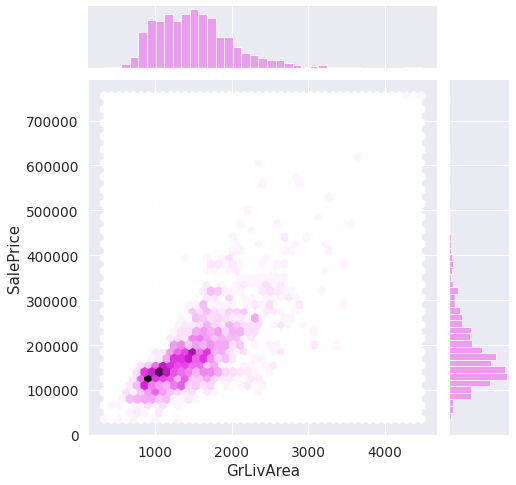

In [ ]:
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'], kind='hex',color='violet',height=7)

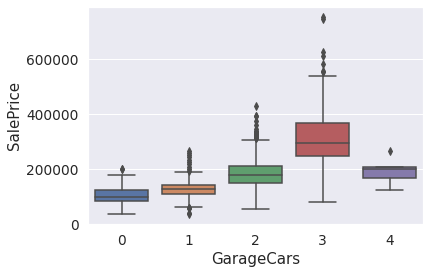

In [ ]:
sns.boxplot(x=train['GarageCars'], y=train['SalePrice'])

In [ ]:
train = train.drop(train[(train['GarageCars']>3) 
                         & (train['SalePrice']<300000)].index).reset_index(drop=True)

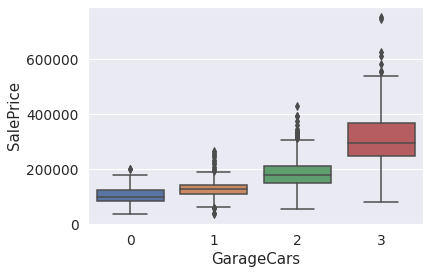

In [ ]:
sns.boxplot(x=train['GarageCars'], y=train['SalePrice'])

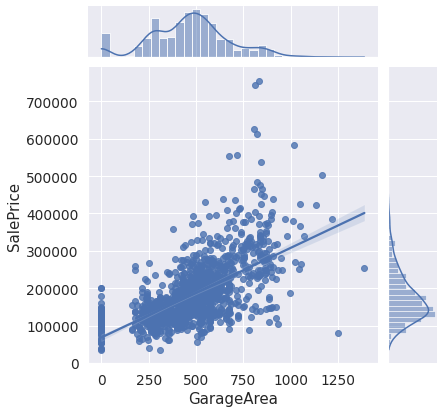

In [ ]:
sns.jointplot(x=train['GarageArea'], y=train['SalePrice'], kind='reg')

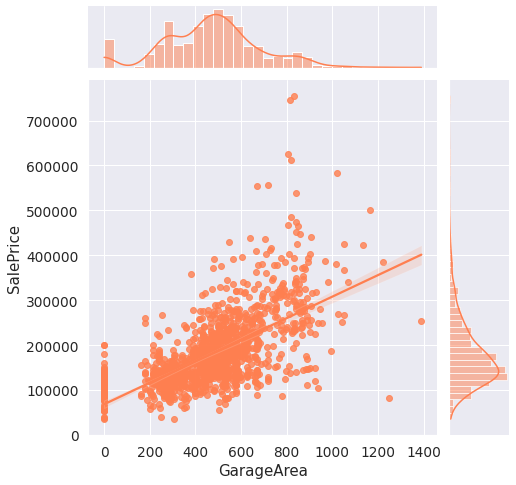

In [ ]:
sns.jointplot(x=train['GarageArea'], y=train['SalePrice'], kind='reg',color='coral',height=7)

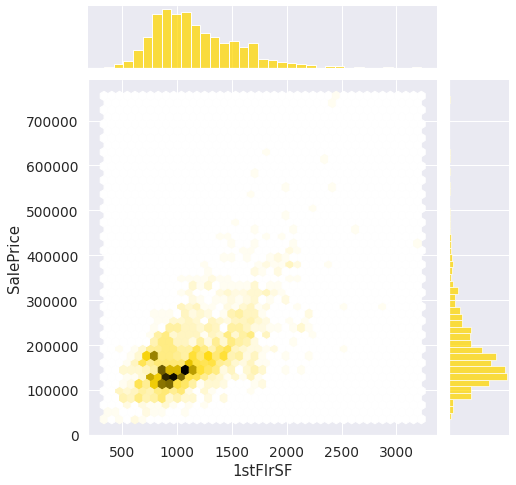

In [ ]:
sns.jointplot(x=train['1stFlrSF'], y=train['SalePrice'], kind='hex',color='gold',height=7)

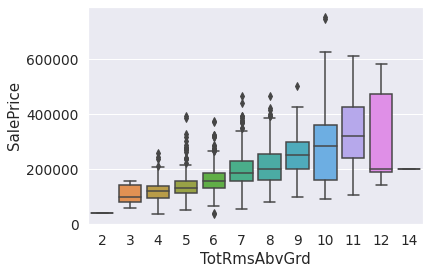

In [ ]:
sns.boxplot(x=train['TotRmsAbvGrd'], y=train['SalePrice'])

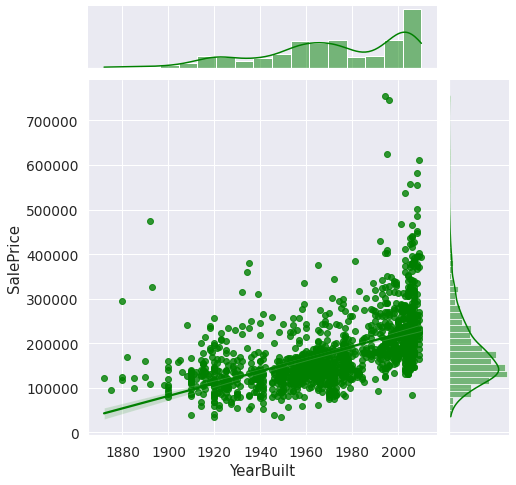

In [ ]:
sns.jointplot(x=train['YearBuilt'], y=train['SalePrice'], kind='reg',color='green',height=7)

**Concatinating Test and Train for making Imputing and Cleaning of Data Easier**

In [ ]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
total=pd.concat((train,test)).reset_index(drop=True)
total.drop(['SalePrice'], axis=1, inplace=True)
print("Combined dataset size is : ",total.shape)

Combined dataset size is :  (2913, 79)


Lets find out the percentage of missing values according to which imputation and datacleaning can take place further

In [ ]:
totalnull=(total.isnull().sum())/len(total)*100
totalnull=totalnull.drop(totalnull[totalnull == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Values' :totalnull})
missing_data

,Missing Values
PoolQC,99.553725
MiscFeature,96.292482
Alley,93.786474
Fence,80.741504
FireplaceQu,47.270855
LotFrontage,17.748026
GarageType,5.561277
GarageYrBlt,5.561277
GarageFinish,5.561277
GarageQual,5.561277


Missing Data Percentage Visualization for Clarity

Text(0.5, 1.0, 'Percent missing data by feature')

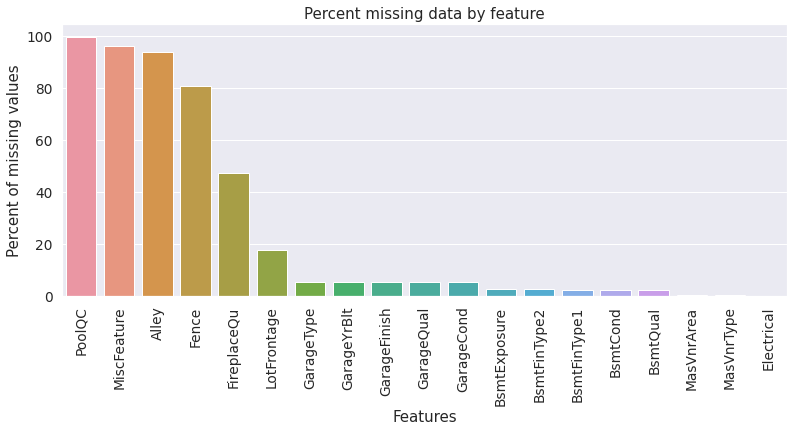

In [ ]:
f, ax = plt.subplots(figsize=(13, 5))
plt.xticks(rotation='90')
sns.barplot(x=totalnull.index, y=totalnull)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

# Imputation of data and deep clean to fill up missing values!!

In [ ]:
total['PoolQC']=total['PoolQC'].fillna('None')
total['MiscFeature']=total['MiscFeature'].fillna('None')
total['Alley']=total['Alley'].fillna('None')
total['Fence']=total['Fence'].fillna('None')
total['FireplaceQu']=total['FireplaceQu'].fillna('None')

Since Neighbourhood and LotFrontage are highly correlated we will fill up lotFrontage's NAN using it

In [ ]:
lot= total.groupby("Neighborhood")["LotFrontage"]
print(lot.median())

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.0
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    71.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64


In [ ]:
total.loc[total.LotFrontage.isnull(),'LotFrontage']=total.groupby("Neighborhood").LotFrontage.transform('median')

Filling other missing categorical and numerical data with 'None'(categorical) and 0(numerical). For some features where we have selected categories we can use MODE to fill up the values

In [ ]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    total[col] = total[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    total[col] = total[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    total[col] = total[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    total[col] = total[col].fillna('None')
total["MasVnrType"] = total["MasVnrType"].fillna("None")
total["MasVnrArea"] =total["MasVnrArea"].fillna(0)
total['MSZoning'] = total['MSZoning'].fillna(total['MSZoning'].mode()[0])
total["Functional"] = total["Functional"].fillna("Typ")
total['Electrical'] = total['Electrical'].fillna("SBrkr")
total['KitchenQual'] = total['KitchenQual'].fillna('TA')
total['Exterior1st'] = total['Exterior1st'].fillna(total['Exterior1st'].mode()[0])
total['Exterior2nd'] = total['Exterior2nd'].fillna(total['Exterior2nd'].mode()[0])
total['SaleType'] = total['SaleType'].fillna(total['SaleType'].mode()[0])
total['MSSubClass'] = total['MSSubClass'].fillna("None")

These values can offer more as categorical features than numerical data,therefore we will be converting them to string

In [ ]:
total['MSSubClass'] = total['MSSubClass'].apply(str)

total['OverallCond'] = total['OverallCond'].astype(str)

total['YrSold'] = total['YrSold'].astype(str)
total['MoSold'] = total['MoSold'].astype(str)

# Adding New Features

In [ ]:
total['TotalSF'] = total['TotalBsmtSF'] + total['1stFlrSF'] + total['2ndFlrSF']
total['Bathrooms']=total['BsmtHalfBath']+total['BsmtFullBath']+total['HalfBath']+total['FullBath']
total['TotalSqu'] = (total['BsmtFinSF1'] + total['BsmtFinSF2'] +total['1stFlrSF'] + total['2ndFlrSF'])
total['pool'] = total['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
total['2ndfloor'] = total['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
total['garage'] = total['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
total['Basement'] = total['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
total['Fireplace'] = total['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

**Dropping some Columns which dont seem that important or signifant or have a history of many missing data**

In [ ]:
total.drop(['Condition1','Condition2','Exterior1st','Exterior2nd'], axis=1, inplace=True)    
total=total.drop(['Utilities','Street','PoolQC'],axis=1)
missing=total.isnull().sum()
missing

MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Alley          0
              ..
pool           0
2ndfloor       0
garage         0
Basement       0
Fireplace      0
Length: 80, dtype: int64

In [ ]:
total.select_dtypes(include=['object']).columns

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

# Preprocessing(LabelEncoder)

Preprocessing(Label encoder):Encode target labels with value between 0 and n_classes-1.It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [ ]:
from sklearn.preprocessing import LabelEncoder
c= ('Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Electrical', 'ExterCond',
       'ExterQual', 'Fence', 'FireplaceQu', 'Foundation', 'Functional',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating',
       'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType',
       'MiscFeature', 'MoSold', 'Neighborhood', 'OverallCond', 'PavedDrive',
        'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType',
        'YrSold')
for i in c:
    l=LabelEncoder()
    l.fit(list(total[i].values))
    total[i]=l.transform(list(total[i].values))
total.shape    

(2913, 80)

Fixing Skewness:skew() function returns unbiased skew over requested axis Normalized by N-1. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


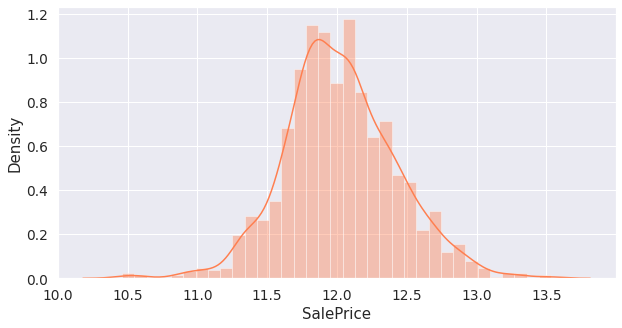

In [ ]:
train["SalePrice"] = np.log1p(train["SalePrice"])
plt.figure(figsize=(10,5))
sns.distplot(train['SalePrice'],color='coral');

In [ ]:
print("Skewness: %f" % train['SalePrice'].skew())

Skewness: 0.123637


**Splitting data into train and test again**

In [ ]:
train = total[:ntrain]
test = total[ntrain:]
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,SaleType,SaleCondition,TotalSF,Bathrooms,TotalSqu,pool,2ndfloor,garage,Basement,Fireplace
0,9,3,65.0,8450,1,3,3,4,0,5,...,8,4,2566,4,2416,0,1,1,1,0
1,4,3,80.0,9600,1,3,3,2,0,24,...,8,4,2524,3,2240,0,0,1,1,1
2,9,3,68.0,11250,1,0,3,4,0,5,...,8,4,2706,4,2272,0,1,1,1,1
3,10,3,60.0,9550,1,0,3,0,0,6,...,8,0,2473,2,1933,0,1,1,1,1
4,9,3,84.0,14260,1,0,3,2,0,15,...,8,4,3343,4,2853,0,1,1,1,1


In [ ]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,SaleType,SaleCondition,TotalSF,Bathrooms,TotalSqu,pool,2ndfloor,garage,Basement,Fireplace
1453,9,3,65.0,8450,1,3,3,4,0,5,...,8,4,2566,4,2416,0,1,1,1,0
1454,4,3,80.0,9600,1,3,3,2,0,24,...,8,4,2524,3,2240,0,0,1,1,1
1455,9,3,68.0,11250,1,0,3,4,0,5,...,8,4,2706,4,2272,0,1,1,1,1
1456,10,3,60.0,9550,1,0,3,0,0,6,...,8,0,2473,2,1933,0,1,1,1,1
1457,9,3,84.0,14260,1,0,3,2,0,15,...,8,4,3343,4,2853,0,1,1,1,1


# Modeling and Predicting

In [ ]:
test.values.shape

(1460, 80)

In [ ]:
x_train=train.values
x_test=test.values
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0)
from sklearn import preprocessing
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

import lightgbm as lgbm


import warnings
warnings.filterwarnings(action='ignore') 
kfold = KFold(n_splits=10, random_state = 77, shuffle = True)

In GridSearchCV approach, machine learning model is evaluated for a range of hyperparameter values. This approach is called GridSearchCV, because it searches for best set of hyperparameters from a grid of hyperparameters values.

Light GBM is a gradient boosting framework that uses tree based learning algorithm.

Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

# Parameters:
- Task: It tells about the task that is to be performed on the data. It can either train on the data or predict on the data
- objective: This parameter specifies whether to do regression or classification. LightGBM default parameter for objective is regression
- subsample: dictates the percentage of rows used per tree building.
So, with this context, if subsample is set to 0.80, first tree gets built with 80% of the data and all the following trees will focus on correcting mistakes.
- max_depth: It gives the depth of the tree and also controls the overfitting of the model. If you feel your model is getting overfitted lower down the max depth.
- learning_rate: he role of learning rate is to power the magnitude of the changes in the approximate that gets updated from each tree’s output. It has value 0.1
- Feature_fraction: It decides the randomly chosen parameter in every iteration for building trees. If it is 0.5 then it means 50% of the parameter would be used.
Num_leaves: It gives the total number of leaves that would be present in a full tree, default value: 31



In [ ]:
# LightGBM Grid Search
params = {
    'task' : 'train',
    'objective' : 'regression',
    'subsample' : 0.8,
    'max_depth' : 7
}

param_grid = {
    'learning_rate': [0.1],
    'feature_fraction' : [0.5, 0.8],
    'num_leaves':[31, 63, 127]
}

lgbm_model = lgbm.LGBMRegressor(**params, verbose=-1)

lgbm_grid  = GridSearchCV(lgbm_model, 
                          param_grid, 
                          cv=kfold, 
                          scoring='neg_mean_squared_error', 
                          return_train_score=True)

lgbm_grid.fit(x_train, y_train)

r2_score(lgbm_grid.predict(x_train), y_train)

lgbm_model.fit(x_train,y_train)

LGBMRegressor(max_depth=7, objective='regression', subsample=0.8, task='train',
              verbose=-1)

In [ ]:
predictions = lgbm_model.predict(test)
print(predictions)

[209886.26877575 177170.99300513 218412.62478825 ... 265781.74593708
 139357.49375675 149385.09946885]


In [ ]:
new_test = pd.read_csv(test_path)
test = new_test.loc[:,'SalePrice']


# Validate

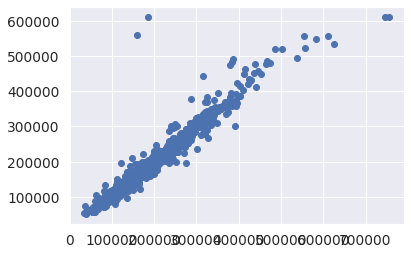

In [ ]:
plt.scatter(test,predictions)

In [ ]:
import cufflinks as cf 
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "colab"
pd.DataFrame({"Predicted price":predictions, "Original price": test}).iplot(mode="markers")

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(test, predictions))
print('MSE:', metrics.mean_squared_error(test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test, predictions)))

MAE: 9767.105365865787
MSE: 471892958.9232801
RMSE: 21723.097360258736


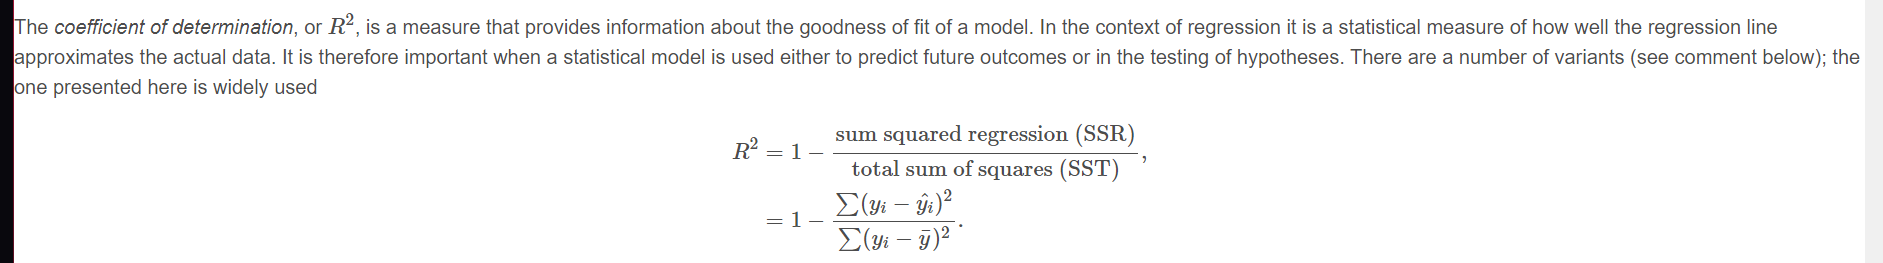

In [ ]:
from sklearn.metrics import r2_score
r2_score(predictions, test)

0.9246864936562821

21.7k